In [72]:
#Hlanhla Hlungwane 
#

import pandas as pd
import seaborn as sns 
import numpy as np 
import sklearn 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

In [73]:
test_data = pd.read_csv('test.csv')
train_data = pd.read_csv('train.csv')

In [74]:
train_data.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [75]:
test_data.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [76]:
test_data.shape

(4209, 377)

In [77]:
train_data.shape

(4209, 378)

In [78]:
print('Training Data type', type(train_data))

Training Data type <class 'pandas.core.frame.DataFrame'>


In [79]:
for i in train_data.columns:
    data_type= train_data[i].dtype
    if data_type =='object':
        print(i)

X0
X1
X2
X3
X4
X5
X6
X8


In [80]:
for j in test_data.columns:
    data_type= test_data[j].dtype
    if data_type =='object':
        print(j)

X0
X1
X2
X3
X4
X5
X6
X8


In [81]:
variance = pow(train_data.drop(columns={'ID','y'}).std(),2).to_dict()

In [82]:
null_count = 0
for key, value in variance.items(): 
    if (value==0):
        print('Name=',key)
        null_count=null_count+1
print(f'Number of columns with zero variance',{null_count})

Name= X11
Name= X93
Name= X107
Name= X233
Name= X235
Name= X268
Name= X289
Name= X290
Name= X293
Name= X297
Name= X330
Name= X347
Number of columns with zero variance {12}


In [83]:
train_data_copy=train_data.copy

In [84]:
train_data=train_data.drop(columns={'X11','X93','X107','X233','X235','X268','X289','X290','X293','X297','X330','X347'})

In [85]:
data = {'color': ['RED', 'GREEN', 'BLUE', 'RED', 'GREEN']}
df = pd.DataFrame(data)

In [86]:
le = LabelEncoder()
df['Color_Encoded'] = le.fit_transform(df['color'])

In [87]:
train_data_feature =  train_data.drop(columns={'y','ID'})

In [88]:
train_data_target = train_data.y

In [89]:
train_data_target

0       130.81
1        88.53
2        76.26
3        80.62
4        78.02
         ...  
4204    107.39
4205    108.77
4206    109.22
4207     87.48
4208    110.85
Name: y, Length: 4209, dtype: float64

In [90]:
train_data_feature.describe(include='object')

,X0,X1,X2,X3,X4,X5,X6,X8
count,4209,4209,4209,4209,4209,4209,4209,4209
unique,47,27,44,7,4,29,12,25
top,z,aa,as,c,d,w,g,j
freq,360,833,1659,1942,4205,231,1042,277


In [91]:
train_data_feature['X0'] = le.fit_transform(train_data_feature.X0)
train_data_feature['X1'] = le.fit_transform(train_data_feature.X1)
train_data_feature['X2'] = le.fit_transform(train_data_feature.X2)
train_data_feature['X3'] = le.fit_transform(train_data_feature.X3)
train_data_feature['X4'] = le.fit_transform(train_data_feature.X4)
train_data_feature['X5'] = le.fit_transform(train_data_feature.X5)
train_data_feature['X6'] = le.fit_transform(train_data_feature.X6)
train_data_feature['X8'] = le.fit_transform(train_data_feature.X8)

In [92]:
X = np.array([[-1,-1], [-2,-1], [-3,-2], [1,1], [2,1], [3,2]])

In [93]:
pca = PCA(n_components = 2)
pca.fit(X)

PCA(n_components=2)

In [94]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.99244289 0.00755711]
[6.30061232 0.54980396]


In [95]:
iris = load_iris()
data = iris.data

In [96]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [97]:
df=pd.DataFrame(data, columns = iris.feature_names)

In [98]:
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [99]:
target = iris.target
df['Target'] = target

In [100]:
pca = PCA(n_components = 2)
principal_components = pca.fit_transform(data)
pc_df = pd.DataFrame(data=principal_components, columns = ['PC1', 'PC2'])
pc_df

pc_df['Target'] = target

In [101]:
test_data.head(2)

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0


In [102]:
pca = PCA (n_components = 0.95)
pca.fit(train_data_feature,train_data_target)

PCA(n_components=0.95)

In [103]:
train_data_feature_trans = pca.fit_transform(train_data_feature)

In [104]:
print(train_data_feature_trans)
print(type(train_data_feature_trans))

[[  0.6147646   -0.13300945  15.62446002   3.68756407   1.35957377
   -2.69141743]
 [  0.56540665   1.56033294  17.9095812   -0.09290212   1.53664826
   -4.44287654]
 [ 16.20171258  12.29284626  17.6335395    0.18630797  11.85081968
   -2.155389  ]
 ...
 [ 29.00466039  14.86090532  -7.75333217  11.22441548  -5.84698483
    0.78930643]
 [ 22.97242171   1.68482437  -9.03124768   9.74980524   9.4495573
   -4.35522827]
 [-17.28304831  -9.95198181  -3.71935977  18.3430963    8.40170568
    0.50947971]]
<class 'numpy.ndarray'>


In [105]:
test_data =  test_data.drop(columns = {'X11','X93', 'X107', 'X233', 'X235', 'X268', 'X289','X290', 'X293', 'X297', 'X330', 'X347'})

In [106]:
test_data.isnull().sum().any()

False

In [107]:
test_data_feature = test_data.drop(columns = ['ID'])

In [108]:
test_data_feature.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,az,v,n,f,d,t,a,w,0,0,...,0,0,0,1,0,0,0,0,0,0
1,t,b,ai,a,d,b,g,y,0,0,...,0,0,1,0,0,0,0,0,0,0
2,az,v,as,f,d,a,j,j,0,0,...,0,0,0,1,0,0,0,0,0,0
3,az,l,n,f,d,z,l,n,0,0,...,0,0,0,1,0,0,0,0,0,0
4,w,s,as,c,d,y,i,m,0,0,...,1,0,0,0,0,0,0,0,0,0


In [109]:
test_data_feature ['X0'] = le.fit_transform(test_data_feature.X0)
test_data_feature ['X1'] = le.fit_transform(test_data_feature.X1)
test_data_feature ['X2'] = le.fit_transform(test_data_feature.X2)
test_data_feature ['X3'] = le.fit_transform(test_data_feature.X3)
test_data_feature ['X4'] = le.fit_transform(test_data_feature.X4)
test_data_feature ['X5'] = le.fit_transform(test_data_feature.X5)
test_data_feature ['X6'] = le.fit_transform(test_data_feature.X6)
test_data_feature ['X8'] = le.fit_transform(test_data_feature.X8)

In [110]:
test_data_feature.dtypes.value_counts()

int64    364
dtype: int64

In [111]:
pca.fit(test_data_feature)

PCA(n_components=0.95)

In [112]:
test_data_feature_trans = pca.fit_transform(test_data_feature)


In [113]:
test_pred = [87.58763, 101.56167, 102.55137, 96.92478, 114.65663, 105.39827]

In [114]:
print(test_data_feature_trans)

[[ 14.58336183  14.16672593  13.53857566   2.40835691  11.31942221
    6.94220721]
 [-15.25161267  -7.73675643  -7.45495068  -2.66203503  11.59379316
    1.15940345]
 [ 11.8564649   -1.68017324  -9.9896148   14.91886587  -1.08886021
   -2.69130553]
 ...
 [-13.44644008   3.2885825   -6.85236431  18.91025575  11.32365564
    3.22410016]
 [ 24.92612317  -4.89888683 -10.16941028  11.44337736   5.90178724
    4.55323232]
 [-15.38430989  -7.73425491 -15.4930104   -0.5595126    4.7793639
    1.0829113 ]]


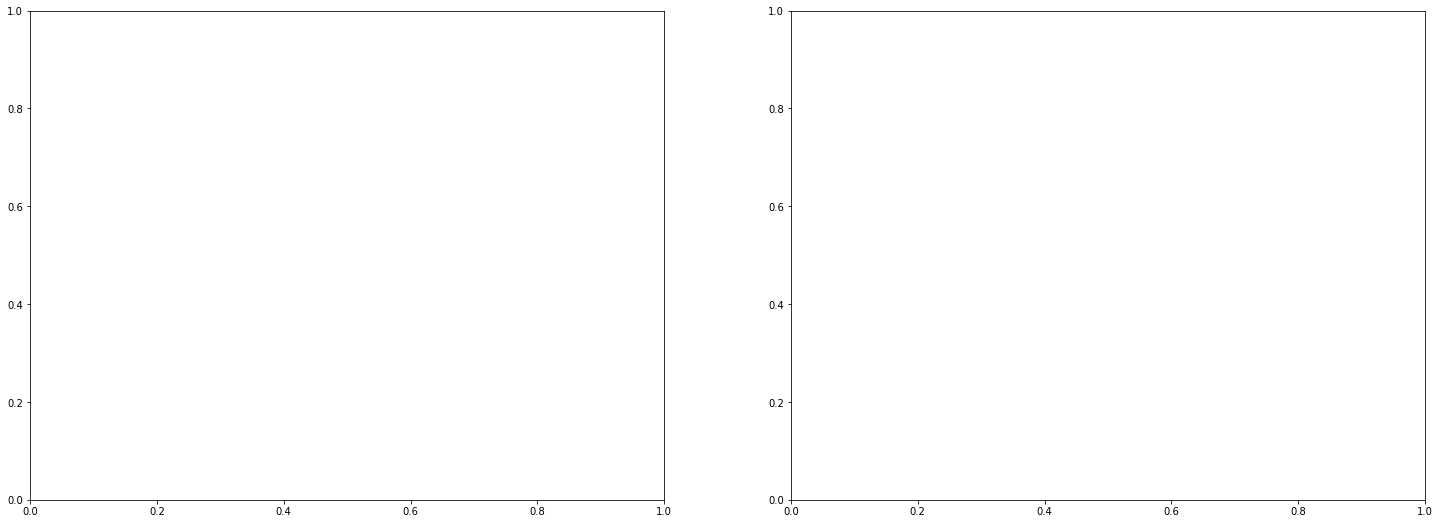

In [115]:
fig,ax = plt.subplots(1,2, figsize = (25,9))

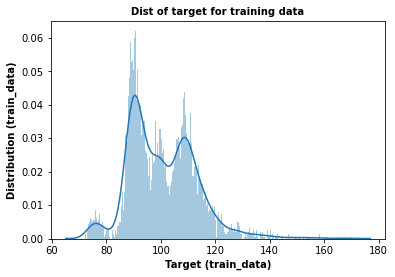

In [116]:
train_plot = sns.distplot(train_data_target[train_data_target < 250], bins=250, kde=True)
train_plot.set_xlabel('Target (train_data)', weight='bold', size=10)
train_plot.set_ylabel('Distribution (train_data)', weight='bold', size=10)
train_plot.set_title('Dist of target for training data', weight='bold', size=10)

# Show the plot
plt.show()

In [ ]:
test_plot = sns.distplot(test_pred[test_pred < 250], bins=250, kde=True)
test_plot.set_xlabel('Target (train_data)', weight='bold', size=25)
test_plot.set_ylabel('Distribution (train_data)', weight='bold', size=25)
tesy_plot.set_title('Dist of target for training data', weight='bold', size=25)

# Show the plot
plt.show()